In [1]:
from importlib import reload
import sys

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# Reload already loaded modules
for m in ("AD5522_pi", "AD7685_pi", "AD5522dev_pi"):
    try:
        mod = sys.modules[m]
    except KeyError:
        pass
    else:
        reload(mod)
from AD5522dev_pi import AD5522dev
from AD5522_pi import MeasMode

In [2]:
board = AD5522dev(vref=5.0)
smu = board.smu
adc = board.adc
board.measchannel = 3
ch3 = board.channels[3]

In [3]:
def _setandmeasure(v):
    ch3.Vforceset = v
    return board.measure(count=10)[0]

ch3.mode = MeasMode.FVMI
v_s = numpy.arange(-6, 6.1, 0.5)
i_s = tuple(_setandmeasure(v) for v in v_s)
ch3.mode = MeasMode.HVMI

plt.plot(v_s, i_s)

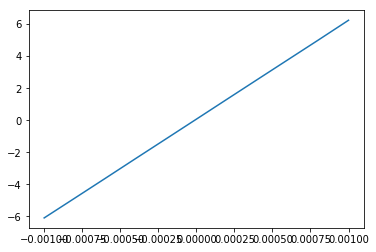

In [4]:
def _setandmeasure(i):
    ch3.Iforceset = i
    return board.measure(count=10)[0]

ch3.mode = MeasMode.FIMV
i_s = numpy.arange(-1e-3, 1.1e-3, 0.2e-3)
v_s = tuple(_setandmeasure(i) for i in i_s)
ch3.mode = MeasMode.HVMI

plt.plot(i_s, v_s)